## Clustering Assignment

### Business Understanding:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent funding programmes, they have been able to raise around $ 10 million. The CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

### Aim

To build clustering models using K-Means and Hierarchical clustering algorithms, to find a list of 5 countries that are in direst need of aid.

### Flow of Analysis

**1. Import the required libraries** <br>
**2. Read and understand the data** <br>
**3. Exploratory Data Analysis**<br>
**4. Building a clustering model**<br>

## 1. Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

---

## 2. Read and understand the data

In [3]:
ngo = pd.read_csv("D:\PGD DS IIITB\Machine Learning I\Clustering Assignment\Country-data.csv")
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
ngo.shape

(167, 10)

In [5]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


---

## 3. Exploratory Data Analysis

**3.1 Missing Values : From the above basic analysis, we can see that the data is clean and there are no missing values.**

**3.2 Outliers Analysis and treatment**

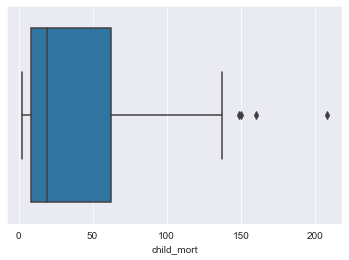

In [7]:
# child_mort column
sns.boxplot(ngo["child_mort"])
plt.show()

In [8]:
np.quantile(ngo["child_mort"], [0.90,0.95,0.99])

array([100.22, 116.  , 153.4 ])

In [9]:
ngo[ (ngo["child_mort"] > (np.quantile(ngo["child_mort"], 0.99))) ]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399


In [10]:
ngo = ngo[~ (ngo["child_mort"] > (np.quantile(ngo["child_mort"], 0.99))) ]

In [11]:
ngo.shape

(165, 10)

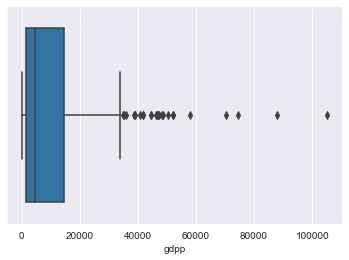

In [12]:
# gdpp column
sns.boxplot(ngo["gdpp"])
plt.show()

In [13]:
np.quantile(ngo["gdpp"], [0.90,0.95,0.99])

array([41860., 48640., 79352.])

In [14]:
ngo[ (ngo["gdpp"] > (np.quantile(ngo["gdpp"], 0.99))) ]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.95,81.0,1.95,87800


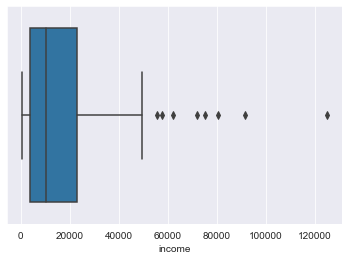

In [15]:
# income column
sns.boxplot(ngo["income"])
plt.show()

In [16]:
np.quantile(ngo["income"], [0.90,0.95,0.99])

array([41280., 48660., 84596.])

In [17]:
ngo[ (ngo["income"] > (np.quantile(ngo["income"], 0.99))) ]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


In [18]:
# From the boxplots of income and gdpp columns, we decide to drop row no. 91 for Luxembourg country and roq no. 123 for Qatar country, since it will skew our further analysis

ngo.drop([91,123], inplace = True)

In [19]:
ngo.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            157, 158, 159, 160, 161, 162, 163, 164, 165, 166],
           dtype='int64', length=163)

**3.3 Univariate Analysis**

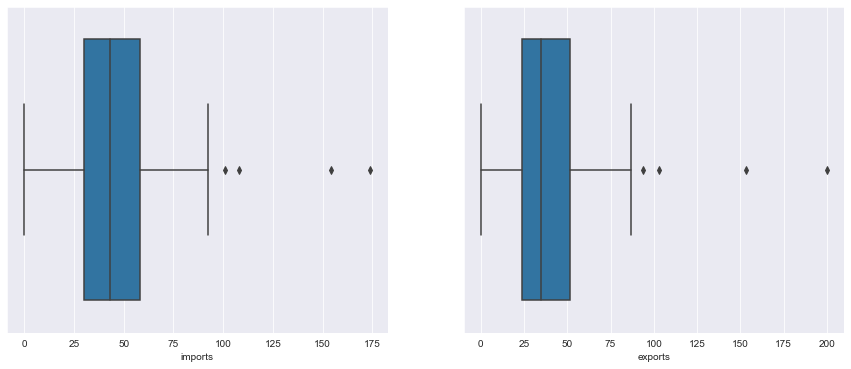

In [20]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(ngo["imports"])

plt.subplot(1,2,2)
sns.boxplot(ngo["exports"])

plt.show()

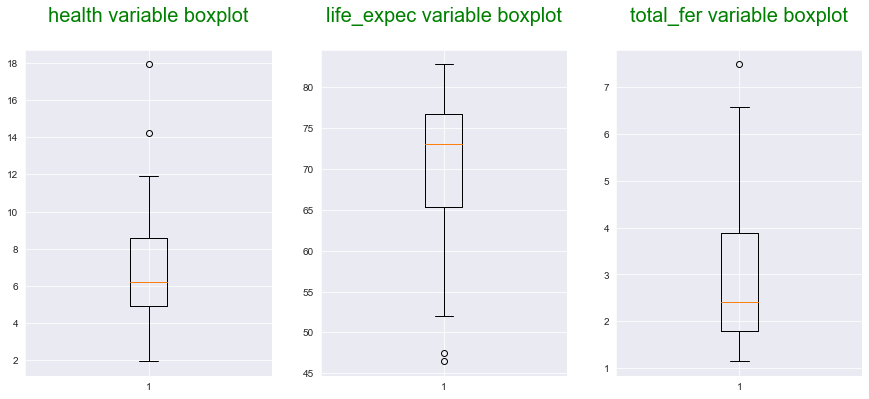

In [21]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.boxplot(ngo["health"])
plt.title("health variable boxplot\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,2)
plt.boxplot(ngo["life_expec"])
plt.title("life_expec variable boxplot\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,3)
plt.boxplot(ngo["total_fer"])
plt.title("total_fer variable boxplot\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

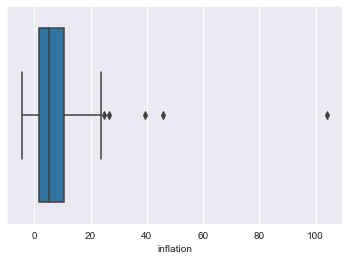

In [22]:
sns.boxplot(ngo["inflation"])
plt.show()

---

**3.4 Bivariate and Multivariate analysis**

In [23]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


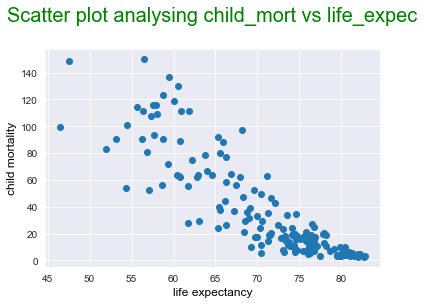

In [24]:
# child_mort vs life_expec
plt.scatter(ngo["life_expec"], ngo["child_mort"])
plt.title("Scatter plot analysing child_mort vs life_expec\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("life expectancy", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("child mortality", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

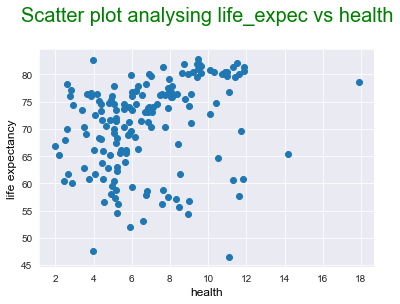

In [25]:
#  life_expec vs health
plt.scatter(ngo["health"], ngo["life_expec"])
plt.title("Scatter plot analysing life_expec vs health\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("health", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("life expectancy", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

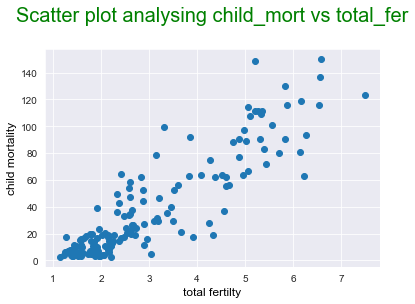

In [26]:
#  child_mort vs total_fer
plt.scatter(ngo["total_fer"], ngo["child_mort"])
plt.title("Scatter plot analysing child_mort vs total_fer\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("total fertilty", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("child mortality", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

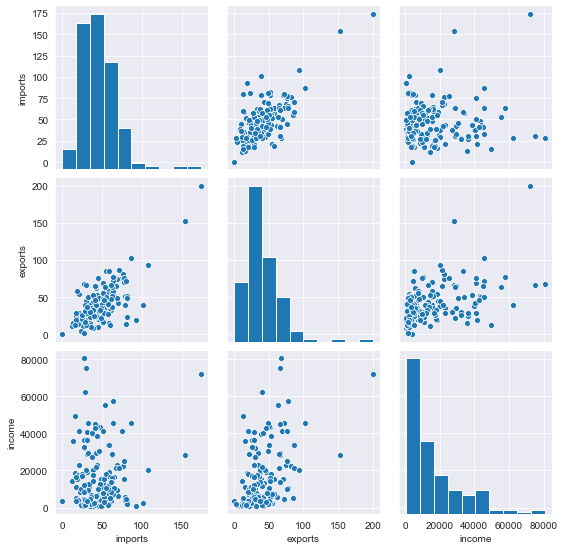

In [27]:
# imports vs exports vs income
sns.pairplot(data = ngo, vars = ["imports","exports","income"])
plt.show()

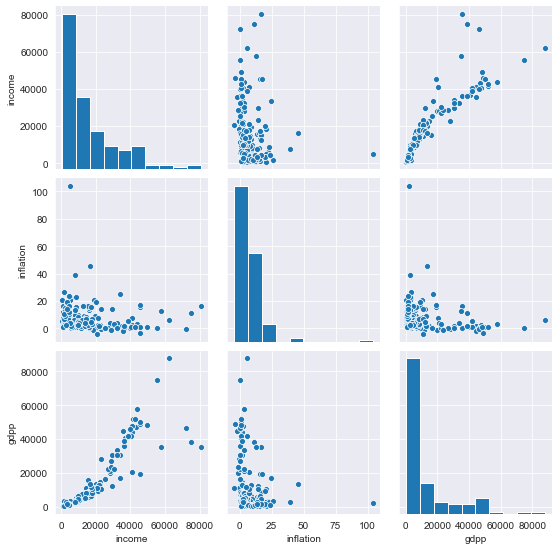

In [28]:
# income vs inflation vs gdpp
sns.pairplot(data = ngo, vars = ["income","inflation","gdpp"])
plt.show()

---

## 4. Building a clustering model

**Let's form a new data frame with required variables**

In [29]:
ngo_new = ngo[["country", "child_mort", "income", "gdpp"]]

In [30]:
new_df = ngo[["child_mort", "income", "gdpp"]]

In [31]:
new_df.shape

(163, 3)

**4.1 Scaling of variables**

In [32]:
scaler = StandardScaler()

In [33]:
new_df_scaled = scaler.fit_transform(new_df)

In [34]:
new_df_scaled.shape

(163, 3)

In [35]:
new_df_scaled = pd.DataFrame(new_df_scaled)

In [36]:
new_df_scaled.columns = ["child_mort", "income", "gdpp"]

In [37]:
new_df_scaled.head()

,child_mort,income,gdpp
0,1.438584,-0.890574,-0.712126
1,-0.547126,-0.383391,-0.495871
2,-0.258443,-0.202342,-0.473249
3,2.215601,-0.629058,-0.530110
4,-0.717099,0.175607,-0.000020


**4.2 Check whether data is good for clustering - Hopkins score**

In [38]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [39]:
hopkins(new_df_scaled)

0.9100187029775759

**Inference : Since the hopkins score is above 90% most of the times after running the function, we infer that the data is fit for clustering**

**4.3 K-Means Clustering**

**Finding optimal number of clusters**

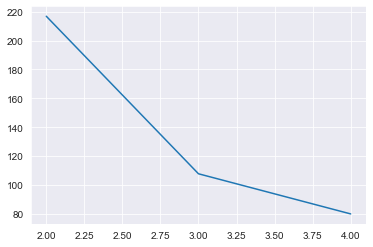

In [40]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters, ssd)
plt.show()

In [41]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(new_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5700176030700941
For n_clusters=3, the silhouette score is 0.5372858379412035
For n_clusters=4, the silhouette score is 0.46744432124529445
For n_clusters=5, the silhouette score is 0.4570998392381344


**Inference : We will go ahead with 3 clusters - k = 3**

In [42]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(new_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [43]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1,
       2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 2])

In [44]:
ngo_new["cluster_id"] = kmeans.labels_

In [45]:
ngo_new.head()

,country,child_mort,income,gdpp,cluster_id
0,Afghanistan,90.2,1610,553,2
1,Albania,16.6,9930,4090,0
2,Algeria,27.3,12900,4460,0
3,Angola,119.0,5900,3530,2
4,Antigua and Barbuda,10.3,19100,12200,0


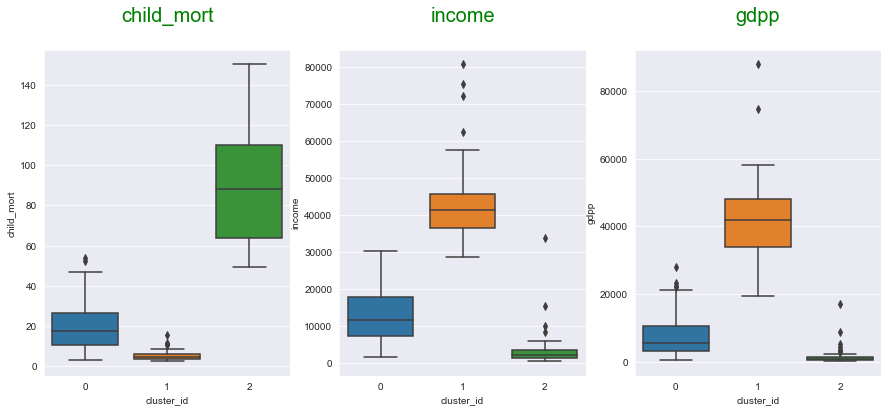

In [46]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(ngo_new["cluster_id"], new_df["child_mort"])
plt.title("child_mort\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,2)
sns.boxplot(ngo_new["cluster_id"], new_df["income"])
plt.title("income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,3)
sns.boxplot(ngo_new["cluster_id"], new_df["gdpp"])
plt.title("gdpp\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

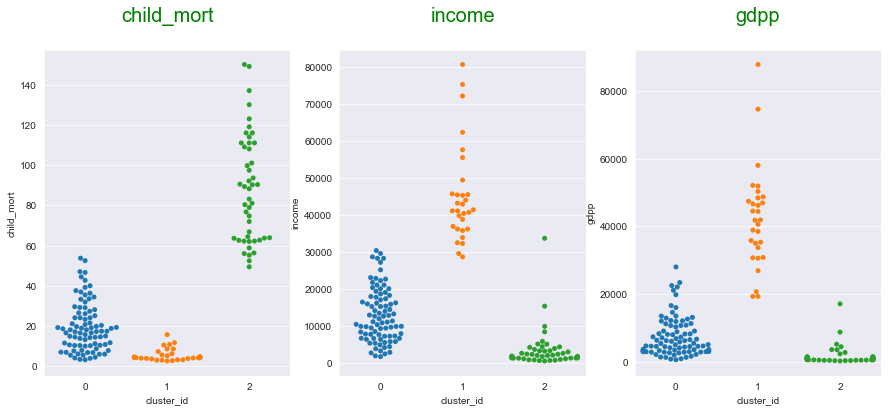

In [47]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.swarmplot(y = ngo_new['child_mort'], x = ngo_new['cluster_id'])
plt.title("child_mort\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,2)
sns.swarmplot(y = ngo_new['income'], x = ngo_new['cluster_id'])
plt.title("income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,3)
sns.swarmplot(y = ngo_new['gdpp'], x = ngo_new['cluster_id'])
plt.title("gdpp\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()


### Following are the 3 clusters formed :
- cluster no. 0 : moderate child mortality, moderate income, moderate gdpp.
- cluster no. 1 : low child mortality, high income, high gdpp.
- cluster no. 2 : high child mortality, low income, low gdpp.

In [48]:
cluster_2_df = ngo_new[(ngo_new["cluster_id"] == 2)]

In [49]:
cluster_2_df.sort_values(["gdpp", "income", "child_mort"], ascending = [True, True, False])[:5]

,country,child_mort,income,gdpp,cluster_id
26,Burundi,93.6,764,231,2
88,Liberia,89.3,700,327,2
37,"Congo, Dem. Rep.",116.0,609,334,2
112,Niger,123.0,814,348,2
93,Madagascar,62.2,1390,413,2


**Inference : From the above analysis using K-means clustering, 5 countries which are in direst need of aid are :**
- Burundi
- Liberia
- Congo, Dem. Rep
- Niger
- Madagascar

**4.4 Hierarchical Clustering**

In [50]:
new_df_scaled.head()

,child_mort,income,gdpp
0,1.438584,-0.890574,-0.712126
1,-0.547126,-0.383391,-0.495871
2,-0.258443,-0.202342,-0.473249
3,2.215601,-0.629058,-0.530110
4,-0.717099,0.175607,-0.000020


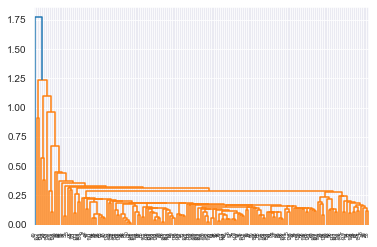

In [51]:
# single linkage
mergings = linkage(new_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

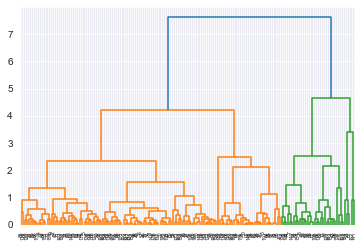

In [52]:
# complete linkage
mergings = linkage(new_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [53]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 3, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 3, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2,
       0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2,
       1, 1, 2, 2, 1, 1, 0, 1, 2, 3, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 0])

In [54]:
ngo_new["cluster_labels"] = cluster_labels

In [55]:
ngo_new.head()

,country,child_mort,income,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,1610,553,2,0
1,Albania,16.6,9930,4090,0,1
2,Algeria,27.3,12900,4460,0,1
3,Angola,119.0,5900,3530,2,0
4,Antigua and Barbuda,10.3,19100,12200,0,1


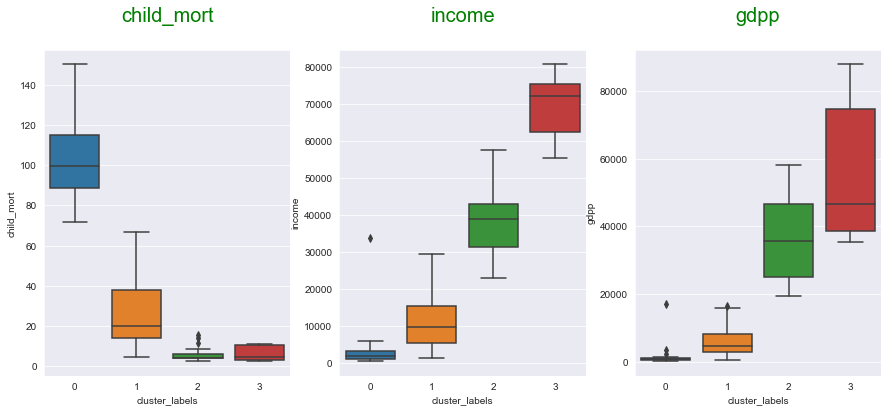

In [56]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(ngo_new["cluster_labels"], new_df["child_mort"])
plt.title("child_mort\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,2)
sns.boxplot(ngo_new["cluster_labels"], new_df["income"])
plt.title("income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,3)
sns.boxplot(ngo_new["cluster_labels"], new_df["gdpp"])
plt.title("gdpp\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

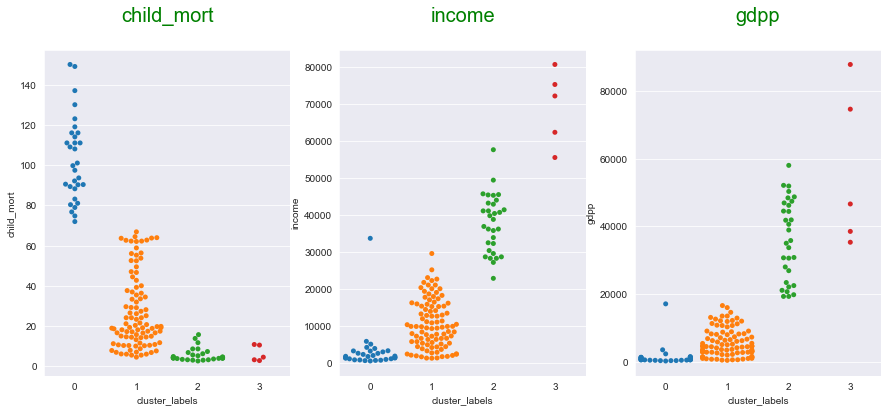

In [57]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.swarmplot(y = ngo_new['child_mort'], x = ngo_new['cluster_labels'])
plt.title("child_mort\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,2)
sns.swarmplot(y = ngo_new['income'], x = ngo_new['cluster_labels'])
plt.title("income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,3)
sns.swarmplot(y = ngo_new['gdpp'], x = ngo_new['cluster_labels'])
plt.title("gdpp\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()


### Following are the 4 clusters formed :
- cluster no. 0 : high child mortality, lowest income range, lowest gdpp range.
- cluster no. 1 : moderate child mortality, low-moderate income range, low-moderate gdpp range.
- cluster no. 2 : low child mortality, moderate income range, moderate gdpp
- cluster no. 3 : lowest child mortality range, very high income range, very high gdpp

In [58]:
cluster_0_df = ngo_new[(ngo_new["cluster_id"] == 0)]

In [59]:
cluster_2_df.sort_values(["gdpp", "income", "child_mort"], ascending = [True, True, False])[:5]

,country,child_mort,income,gdpp,cluster_id
26,Burundi,93.6,764,231,2
88,Liberia,89.3,700,327,2
37,"Congo, Dem. Rep.",116.0,609,334,2
112,Niger,123.0,814,348,2
93,Madagascar,62.2,1390,413,2


**Inference : From the above analysis using Hierarchical clustering, 5 countries which are in direst need of aid are :**
- Burundi
- Liberia
- Congo, Dem. Rep
- Niger
- Madagascar

### We can see that though the number of clusters formed using K-Means Clustering and Hierarchical Clustering are different, both the algorithms give same recommendations.

## Our Analysis is Complete.